In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a Robot Simulator in 2D

In [2]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [3]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [4]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    # ellipse control policy
    ux = -sin(2*t)
    uy = cos(2*t)

    return array([ux, uy])

### Running the simulator

In [5]:
from numpy import pi

# final time to be a multiple of 2*pi for 8 curve
tf = 2 * pi
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# tf = 3.
# Δt = 0.1    # Time step
# time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# new initial condition for 8 curve
x = array([0.0, 0.0])

# Initial conditions
# x = array([2., 1.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

circuler motion

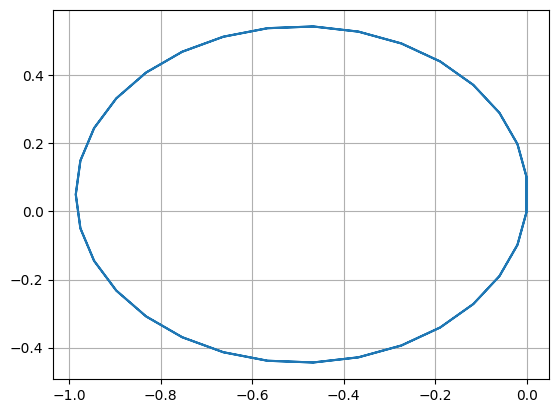

In [6]:
grid()
plot(x_log[:,0], x_log[:,1])

In [7]:
!pip install JSAnimation


  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11405 sha256=e535b29c161a6b84de1f166fe23d594b08cacdd25b7dcd3105547596f75f198e
  Stored in directory: /root/.cache/pip/wheels/1e/16/64/028f540fe8f5eae5026a423bfd88356248074379b79f27b646
Successfully built JSAnimation


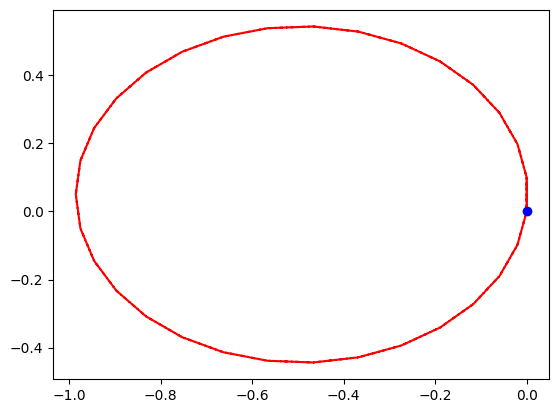

In [8]:


import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML



fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')

    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')



anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())